In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math
from scipy.optimize import minimize
import scipy.stats as ss
from scipy.signal import find_peaks 
from matplotlib import rc
from scipy.optimize import fsolve

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#en figur der fylder en kolonne har bredde 5,8, f.eks: fig, ax= plt.subplots(figsize=(5.8,4))
#en figur der fylder to kolonner har dobbeltbredde??

In [80]:
data = np.transpose(np.loadtxt('dt:500lower515upper521.txt'))
time = data[0]
counts = data[1]

In [81]:
def ekspLin(x,a,g,b):
    return a*np.exp(-x*g)+b

Text(0.5, 0, 'Time [ms]')

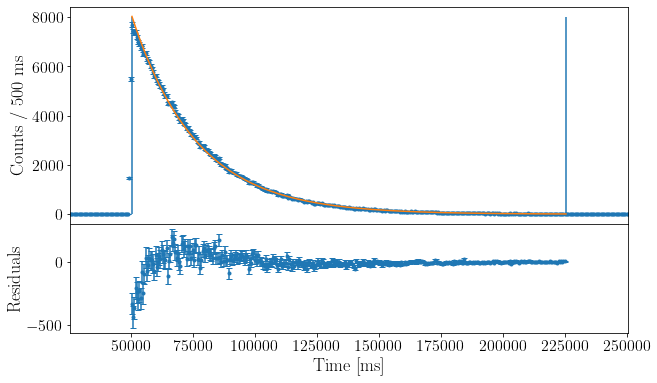

In [85]:
fig, ax = plt.subplots(2,1,figsize = [10,6],sharex = True,gridspec_kw={'height_ratios': [2, 1]})
plt.subplots_adjust(wspace=0, hspace=0)

lowerIndex = 100
upperIndex = 450

popt,pcov = curve_fit(ekspLin,time[lowerIndex:upperIndex],counts[lowerIndex:upperIndex],sigma=np.sqrt(counts+1)[lowerIndex:upperIndex],p0=[8000,3.960841031771116e-05,6],absolute_sigma = True)

time_linspace = np.linspace(time[lowerIndex],time[upperIndex],1000)

ax[0].errorbar(time,counts,yerr=np.sqrt(counts),fmt = '.',capsize = 3)
ax[0].plot(time_linspace,ekspLin(time_linspace,*popt),zorder=10)
ax[0].set_xlim(time[lowerIndex-50],time[upperIndex+50])
ax[0].vlines(time[lowerIndex],0,8000)
ax[0].vlines(time[upperIndex],0,8000)
ax[0].set_ylabel('Counts / 500 ms')

ax[1].set_ylabel('Residuals')
ax[1].errorbar(time[lowerIndex:upperIndex],counts[lowerIndex:upperIndex]-ekspLin(time[lowerIndex:upperIndex],*popt),yerr=np.sqrt(counts)[lowerIndex:upperIndex], fmt = '.', capsize = 3)
ax[1].set_xlabel('Time [ms]')

In [86]:
popt

array([ 5.59319098e+04,  3.84316810e-05, -2.51969029e+00])

In [87]:
time[lowerIndex]

50500.0

In [99]:
np.log(2)/(3.84316810e-05*1000)

18.035827799464332

In [100]:
#N0m er altså 6.22612155e+04*2 * np.exp(-3.84316810e-05 * 1000 * 50500 ) / ( 3.84316810e-05 * 1000 * eff(518)
N0m = popt[0]*2 * np.exp(-popt[1] * 50500 ) / ( popt[1] * 1000 * 0.05247690176023714) 
N0m

7964406.072148679

In [101]:
#Langt ude i tid er der N0g + N0m Cs136g atomer. 
N0g = 3811*4/(0.035816268182276234 * 0.9970 * np.log(2)/(13.04*24*60*60) * (750))-N0m
N0g

917219475.5367836

In [102]:
N0m/N0g

0.008683206456652784

NameError: name 'upperIndex' is not defined

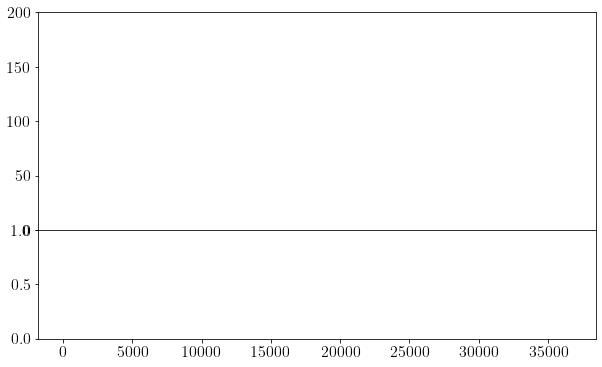

In [77]:
fig, ax = plt.subplots(2,1,figsize = [10,6],sharex = True,gridspec_kw={'height_ratios': [2, 1]})
plt.subplots_adjust(wspace=0, hspace=0)

ax[0].set_ylim(0,200)
ax[0].errorbar(time,counts,yerr=np.sqrt(counts),fmt = '.',capsize = 3)
ax[0].plot(time_linspace,ekspLin(time_linspace,*popt),zorder=10)
ax[0].set_xlim(time[upperIndex-50],time[upperIndex+50])
ax[0].set_xlim(time[upperIndex-50],time[upperIndex+50])
ax[0].vlines(time[lowerIndex],0,8000)
ax[0].vlines(time[upperIndex],0,8000)
ax[0].set_ylabel('Counts / 500 ms')

ax[1].set_ylim(-25,25)
ax[1].set_ylabel('Residuals')
ax[1].errorbar(time[lowerIndex:upperIndex],counts[lowerIndex:upperIndex]-ekspLin(time[lowerIndex:upperIndex],*popt),yerr=np.sqrt(counts)[lowerIndex:upperIndex], fmt = '.', capsize = 3)
ax[1].set_xlabel('Time [ms]')

In [133]:
reducedChi2s = []
lowerIndeces = []
for i in range(200):
    lowerIndex = 100+i
    upperIndex = 370
    popt,pcov = curve_fit(ekspLin,time[lowerIndex:upperIndex],counts[lowerIndex:upperIndex],sigma=np.sqrt(counts+1)[lowerIndex:upperIndex],p0=[8000,3.960841031771116e-05,6],absolute_sigma = True)
    chi2 = np.sum((counts[lowerIndex:upperIndex]-ekspLin(time[lowerIndex:upperIndex],*popt))**2/counts[lowerIndex:upperIndex])
    reducedChi2s.append(chi2/(upperIndex-lowerIndex-3))
    lowerIndeces.append(lowerIndex)

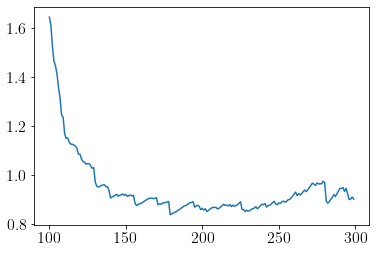

In [134]:
plt.plot(lowerIndeces,reducedChi2s)

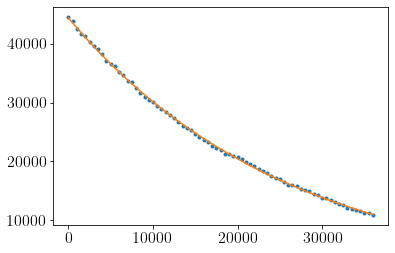

In [43]:
popt, pcov = popt,pcov = curve_fit(ekspLin,time,counts,sigma=np.sqrt(counts+1),p0=[8000,3.960841031771116e-05,6],absolute_sigma = True)


plt.plot(time,counts,'.')
plt.plot(time,ekspLin(time,*popt))

Text(0.5, 0, 'Time [ms]')

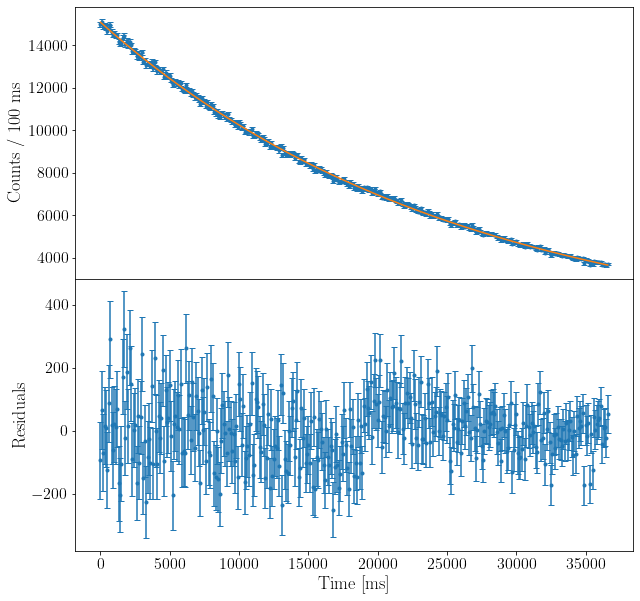

In [103]:
fig, ax = plt.subplots(2,1,figsize = [10,10],sharex = True,gridspec_kw={'height_ratios': [1, 1]})
plt.subplots_adjust(wspace=0, hspace=0)

data = np.transpose(np.loadtxt('dt:100lower513upper522.txt'))
time = data[0][1:-2]-3000
counts = data[1][1:-2]

popt, pcov = popt,pcov = curve_fit(ekspLin,time,counts,sigma=np.sqrt(counts+1),p0=[9000,3.960841031771116e-05,6],absolute_sigma = True)

time_linspace = np.linspace(time[0],time[-1],1000)

ax[0].errorbar(time,counts,yerr=np.sqrt(counts),fmt = '.',capsize = 3)
ax[0].plot(time_linspace,ekspLin(time_linspace,*popt),zorder=10)
ax[0].set_ylabel('Counts / 100 ms')

ax[1].set_ylabel('Residuals')
ax[1].errorbar(time,counts-ekspLin(time,*popt),yerr=np.sqrt(counts), fmt = '.', capsize = 3)
ax[1].set_xlabel('Time [ms]')

Text(0.5, 0, 'Time [ms]')

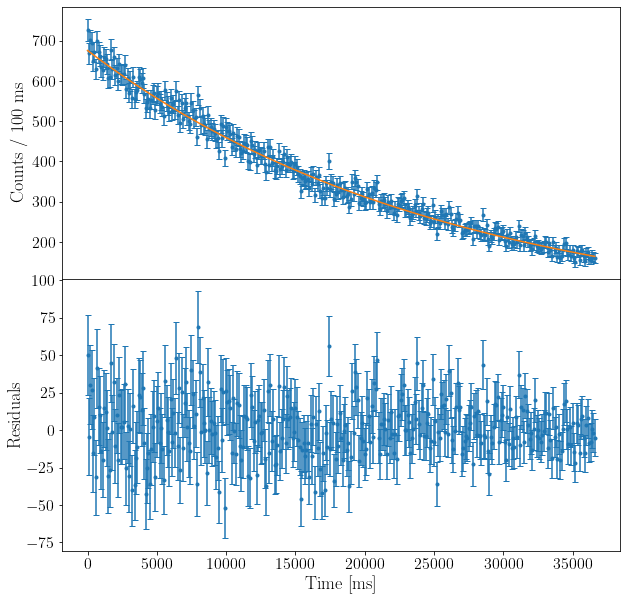

In [107]:
fig, ax = plt.subplots(2,1,figsize = [10,10],sharex = True,gridspec_kw={'height_ratios': [1, 1]})
plt.subplots_adjust(wspace=0, hspace=0)

data = np.transpose(np.loadtxt('dt:100lower513upper522.txt'))
time = data[0][1:-2]-3000
counts = data[1][1:-2]

popt, pcov = popt,pcov = curve_fit(ekspLin,time,counts,sigma=np.sqrt(counts+1),p0=[9000,3.960841031771116e-05,6],absolute_sigma = True)

time_linspace = np.linspace(time[0],time[-1],1000)

ax[0].errorbar(time,counts,yerr=np.sqrt(counts),fmt = '.',capsize = 3)
ax[0].plot(time_linspace,ekspLin(time_linspace,*popt),zorder=10)
ax[0].set_ylabel('Counts / 100 ms')

ax[1].set_ylabel('Residuals')
ax[1].errorbar(time,counts-ekspLin(time,*popt),yerr=np.sqrt(counts), fmt = '.', capsize = 3)
ax[1].set_xlabel('Time [ms]')

In [106]:
np.log(2)/popt[1]

17434.666237675916

In [47]:
np.sqrt(np.diag(pcov)[0])

194.50224046410437

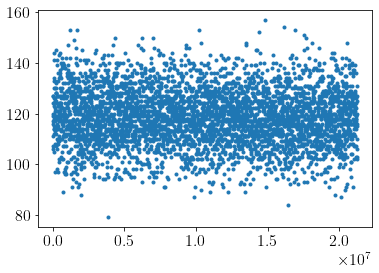

In [50]:
data = np.transpose(np.loadtxt('dt:5000lower815upper822.txt'))
time = data[0][0:-4]
counts = data[1][0:-4]
plt.plot(time,counts,'.')

In [51]:
np.sqrt(120)

10.954451150103322

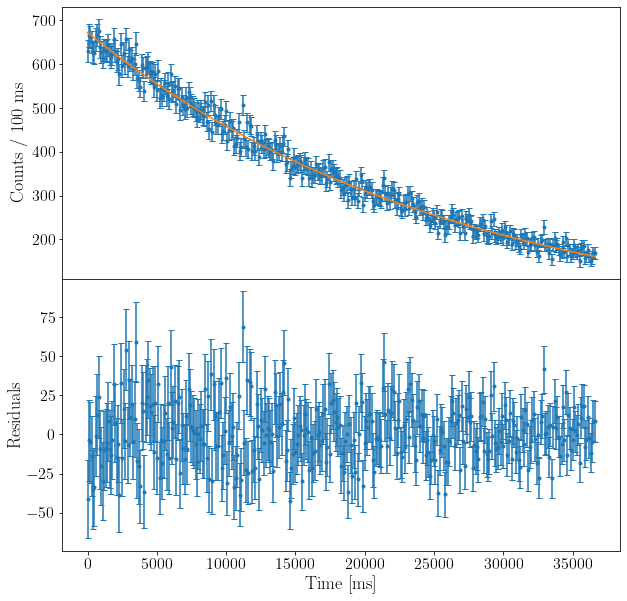

In [118]:
fig, ax = plt.subplots(2,1,figsize = [10,10],sharex = True,gridspec_kw={'height_ratios': [1, 1]})
plt.subplots_adjust(wspace=0, hspace=0)

data = np.transpose(np.loadtxt('dt:100lower513upper522.txt'))
time = data[0][1:-2]-3000
counts = data[1][1:-2]

popt, pcov = popt,pcov = curve_fit(ekspLin,time,counts,sigma=np.sqrt(counts+1),p0=[9000,3.960841031771116e-05,6],absolute_sigma = True)

time_linspace = np.linspace(time[0],time[-1],1000)

ax[0].errorbar(time,counts,yerr=np.sqrt(counts),fmt = '.',capsize = 3)
ax[0].plot(time_linspace,ekspLin(time_linspace,*popt),zorder=10)
ax[0].set_ylabel('Counts / 100 ms')

ax[1].set_ylabel('Residuals')
ax[1].errorbar(time,counts-ekspLin(time,*popt),yerr=np.sqrt(counts), fmt = '.', capsize = 3)
ax[1].set_xlabel('Time [ms]')
fig.savefig('singlePulsesRun102/pulse9.jpg')

In [ ]:
fig, ax = plt.subplots(2,1,figsize = [10,10],sharex = True,gridspec_kw={'height_ratios': [1, 1]})
plt.subplots_adjust(wspace=0, hspace=0)

data = np.transpose(np.loadtxt('dt:100lower513upper522.txt'))
time = data[0][1:-2]-3000
counts = data[1][1:-2]

popt, pcov = popt,pcov = curve_fit(ekspLin,time,counts,sigma=np.sqrt(counts+1),p0=[9000,3.960841031771116e-05,6],absolute_sigma = True)

time_linspace = np.linspace(time[0],time[-1],1000)

ax[0].errorbar(time,counts,yerr=np.sqrt(counts),fmt = '.',capsize = 3)
ax[0].plot(time_linspace,ekspLin(time_linspace,*popt),zorder=10)
ax[0].set_ylabel('Counts / 100 ms')

ax[1].set_ylabel('Residuals')
ax[1].errorbar(time,counts-ekspLin(time,*popt),yerr=np.sqrt(counts), fmt = '.', capsize = 3)
ax[1].set_xlabel('Time [ms]')